In [107]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
from scipy import optimize

import corner

import radvel
import radvel.likelihood
from radvel.plot import orbit_plots, mcmc_plots

matplotlib.rcParams['font.size'] = 14

In [108]:
vel = np.array([-0.79123789,  1.18282106,  1.45907564, -0.82337484, -1.19142059,
       -1.27262365, -4.30637184, -3.61622486,  0.23782353, -1.11790167,
        0.18874376,  4.49920351, -0.98566403,  3.61101332,  0.05935632,
        3.92243299,  4.2596816 ,  0.14644892,  1.75377981,  4.71677545,
       -0.78882164, -2.61077532, -0.05835168,  1.20700073, -0.67498187,
       -2.48036518,  0.2424131 , -3.14940814, -2.68597848, -0.08870739,
        1.59175168,  1.25175654,  1.42616366,  1.84635921,  2.03627137,
        4.62307864,  4.29266207, -5.33074181, -2.26298986,  3.14977204,
        1.78282354,  1.06519802, -0.30625808,  2.00099772, -0.32452853,
       -0.66027696, -1.31736111,  0.8156946 ,  1.38215275, -2.77746066,
       -2.38115871,  1.28716442,  4.54801501,  4.209627  ,  3.52061207,
        3.35557954,  0.42775506,  2.57500325,  2.8931885 ,  2.863941  ,
       -2.28454351,  2.90191516,  2.4896721 , -6.94677807, -4.73905268,
        2.13517211, -3.23572518, -3.44182409, -1.1759598 ,  1.31620383,
        2.25463536,  0.86740484,  2.5636416 ])

t = np.array([57254.59375   , 57257.578125  , 57267.62109375, 57269.55859375,
       57270.54296875, 57271.546875  , 57272.5859375 , 57301.4765625 ,
       57302.48046875, 57321.4453125 , 57322.453125  , 57325.3046875 ,
       57330.33203125, 57331.33203125, 57332.33203125, 57336.33203125,
       57353.3359375 , 57354.3359375 , 57354.35546875, 57356.296875  ,
       57380.30078125, 57381.30078125, 57382.296875  , 57384.30078125,
       57559.71875   , 57560.69921875, 57562.7109375 , 57563.703125  ,
       57564.71875   , 57565.70703125, 57566.71875   , 57573.703125  ,
       57574.68359375, 57574.734375  , 57576.66796875, 57576.734375  ,
       57578.65625   , 57579.6484375 , 57579.73046875, 57616.54296875,
       57616.6171875 , 57617.55078125, 57617.62109375, 57618.546875  ,
       57618.62109375, 57651.4296875 , 57651.5234375 , 57652.4296875 ,
       57652.52734375, 57653.43359375, 57653.52734375, 57654.43359375,
       57654.53125   , 57655.5078125 , 57656.4375    , 57656.515625  ,
       57657.4296875 , 57657.52734375, 57658.453125  , 57658.52734375,
       57659.5       , 57661.41796875, 57661.5078125 , 57669.42578125,
       57669.52734375, 57670.42578125, 57670.51171875, 57671.41796875,
       57671.5078125 , 57672.421875  , 57672.5078125 , 57673.41796875,
       57673.5078125 ])

errvel = np.array([1.02999997, 1.14999998, 1.16999996, 1.25      , 0.87      ,
       0.86000001, 1.00999999, 1.00999999, 1.19000006, 1.77999997,
       0.85000002, 1.04999995, 1.03999996, 1.05999994, 1.15999997,
       1.03999996, 2.91000009, 3.67000008, 1.24000001, 1.41999996,
       1.28999996, 1.74000001, 1.11000001, 1.62      , 1.16999996,
       1.14999998, 1.25999999, 1.35000002, 1.26999998, 1.35000002,
       1.04999995, 1.20000005, 1.13      , 0.95999998, 0.95999998,
       1.05999994, 3.3900001 , 2.58999991, 2.75999999, 1.98000002,
       1.53999996, 1.        , 0.86000001, 1.19000006, 0.93000001,
       0.92000002, 1.00999999, 0.94      , 0.93000001, 1.25      ,
       1.01999998, 1.24000001, 1.17999995, 2.5       , 1.47000003,
       2.03999996, 1.84000003, 2.38000011, 1.80999994, 1.52999997,
       0.94      , 0.93000001, 1.17999995, 1.17999995, 1.47000003,
       1.38999999, 1.04999995, 0.92000002, 0.88      , 0.89999998,
       0.77999997, 1.08000004, 1.08000004])

ti = np.linspace(t[0]-5,t[-1]+5,100)

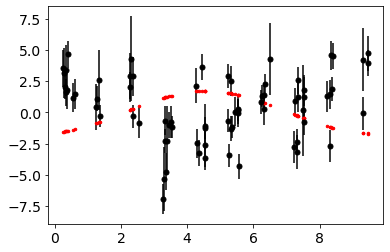

In [117]:
per =  9.978570
tp = -274.6611500000581
e = 0.0
om = 0.1
K = 1.7
orbel = [per, tp, e, om, K]
model = radvel.kepler.rv_drive(t, orbel, use_c_kepler_solver=True)

plt.errorbar(t%per, vel, yerr = errvel,fmt = 'o', color='k')
plt.plot(t%per, model, ".", color='r')

In [98]:
def initialize_model():
    time_base =  57000
    params = radvel.Parameters(1,basis='per tc secosw sesinw logk') # number of planets = 2
    params['per1'] = radvel.Parameter(value=20.885258)
    params['tc1'] = radvel.Parameter(value=-274.6611500000581)
    params['secosw1'] = radvel.Parameter(value=0.01)
    params['sesinw1'] = radvel.Parameter(value=0.01)
    params['logk1'] = radvel.Parameter(value=1.1)
    mod = radvel.RVModel(params, time_base=time_base)
    mod.params['dvdt'] = radvel.Parameter(value=-0.02)
    mod.params['curv'] = radvel.Parameter(value=0.01)
    return mod

In [99]:
def plot_results(like):
    fig = pl.figure(figsize=(12,4))
    fig = pl.gcf()
    fig.set_tight_layout(True)
    pl.errorbar(
        like.x, like.model(t)+like.residuals(), 
        yerr=like.yerr, fmt='o'
        )
    pl.plot(ti, like.model(ti))
    pl.xlabel('Time')
    pl.ylabel('RV')
    pl.draw()

In [100]:
mod = initialize_model()
like = radvel.likelihood.RVLikelihood(mod, t, vel, errvel)
like.params['gamma'] = radvel.Parameter(value=0.1, vary=False, linear=True)
like.params['jit'] = radvel.Parameter(value=1.0)

In [101]:
like.params['secosw1'].vary = False
like.params['sesinw1'].vary = False
like.params['per1'].vary = False
like.params['tc1'].vary = False
print(like)

parameter                     value      vary
per1                        20.8853      False
tc1                        -274.661      False
secosw1                        0.01      False
sesinw1                        0.01      False
logk1                           1.1       True
dvdt                          -0.02       True
curv                           0.01       True
gamma                           0.1      False
jit                               1       True
tp1                        -277.271           
e1                           0.0002           
w1                         0.785398           
k1                          3.00417           



<Figure size 432x288 with 0 Axes>

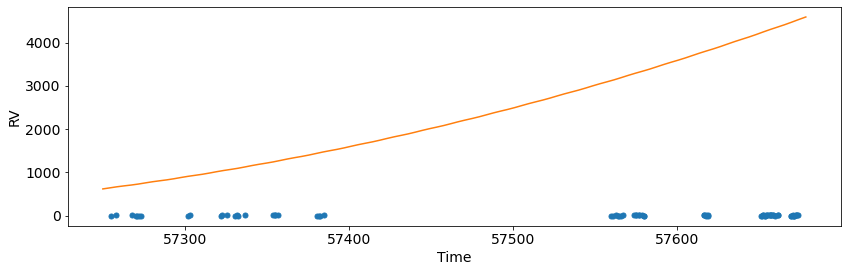

In [102]:
pl.figure()
plot_results(like)

In [77]:
ti

array([57249.59375   , 57253.92621528, 57258.25868056, 57262.59114583,
       57266.92361111, 57271.25607639, 57275.58854167, 57279.92100694,
       57284.25347222, 57288.5859375 , 57292.91840278, 57297.25086806,
       57301.58333333, 57305.91579861, 57310.24826389, 57314.58072917,
       57318.91319444, 57323.24565972, 57327.578125  , 57331.91059028,
       57336.24305556, 57340.57552083, 57344.90798611, 57349.24045139,
       57353.57291667, 57357.90538194, 57362.23784722, 57366.5703125 ,
       57370.90277778, 57375.23524306, 57379.56770833, 57383.90017361,
       57388.23263889, 57392.56510417, 57396.89756944, 57401.23003472,
       57405.5625    , 57409.89496528, 57414.22743056, 57418.55989583,
       57422.89236111, 57427.22482639, 57431.55729167, 57435.88975694,
       57440.22222222, 57444.5546875 , 57448.88715278, 57453.21961806,
       57457.55208333, 57461.88454861, 57466.21701389, 57470.54947917,
       57474.88194444, 57479.21440972, 57483.546875  , 57487.87934028,
      